In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
# Check for null values
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [30]:
# Drop the unnecessary columns
df.drop(['Type of Travel'], axis=1, inplace=True)

In [31]:
df

,Age,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,48,0,821,2,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,35,0,821,26,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,41,0,853,0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,50,0,1905,0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,49,0,3470,0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,2,447,2,4,4,4,4,2,5,1,4,4,4,5,4,4,4,0
129876,41,2,308,0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,0
129877,42,2,337,6,5,2,4,2,1,3,3,4,3,3,4,2,3,5,0
129878,50,2,337,31,4,4,3,4,1,4,4,5,3,3,4,5,3,5,1


In [32]:
# Label Encoding
le = LabelEncoder()
df['Satisfaction'] = le.fit_transform(df['Satisfaction'])
df['Class'] = le.fit_transform(df['Class'])
df.dtypes

Age                                       int64
Class                                     int64
Flight Distance                           int64
Departure Delay                           int64
Departure and Arrival Time Convenience    int64
Ease of Online Booking                    int64
Check-in Service                          int64
Online Boarding                           int64
Gate Location                             int64
On-board Service                          int64
Seat Comfort                              int64
Leg Room Service                          int64
Cleanliness                               int64
Food and Drink                            int64
In-flight Service                         int64
In-flight Wifi Service                    int64
In-flight Entertainment                   int64
Baggage Handling                          int64
Satisfaction                              int64
dtype: object

In [33]:
# Split the dataset into training and testing sets
X = df.drop(['Satisfaction'], axis=1)
y = df['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.39%


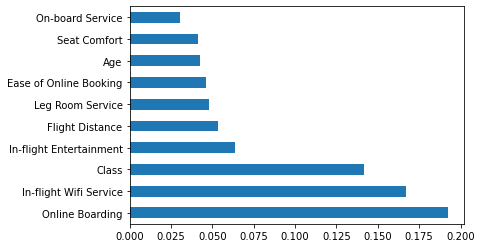

In [37]:
# Visualize the feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()